# Central House & Pollution Sensor Mapping

<br>

### Imports

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Spatial Manipulation
import geopandas as gpd
from shapely.geometry import Point, Polygon

## Mapping
import osmnx as ox
import folium
from folium import plugins

# Misc
from ipypb import track

In [3]:
def hide_spines(ax, positions=['top', 'right']):
    """
    Pass a matplotlib axis and list of positions with spines to be removed
    
    args:
        ax:          Matplotlib axis object
        positions:   Python list e.g. ['top', 'bottom']
    """
    assert isinstance(positions, list), 'Position must be passed as a list '
    
    for position in positions:
        ax.spines[position].set_visible(False)

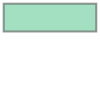

In [4]:
north, south, east, west = 51.531, 51.525, -0.120, -0.140

bbox = ox.bbox_to_poly(north, south, east, west)

bbox

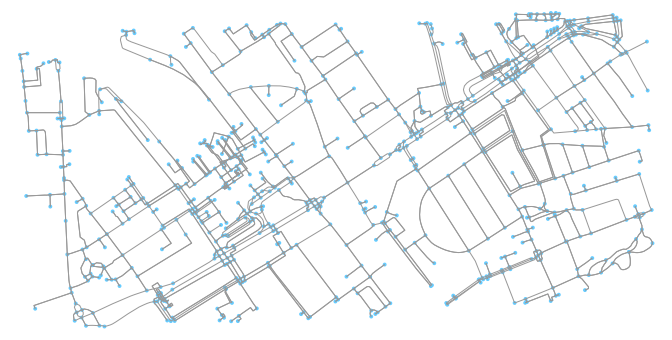

In [5]:
streets_graph = ox.graph_from_polygon(bbox)
streets_graph = ox.project_graph(streets_graph)

fig, ax = ox.plot_graph(streets_graph)

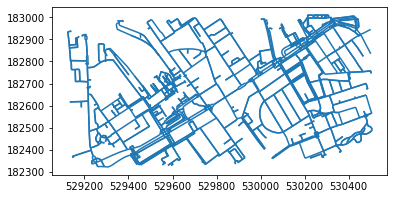

In [6]:
gdf_street_nodes, gdf_street_edges = ox.graph_to_gdfs(streets_graph)

gdf_street_nodes = gdf_street_nodes.to_crs(epsg=27700)
gdf_street_edges = gdf_street_edges.to_crs(epsg=27700)

gdf_street_edges.plot()

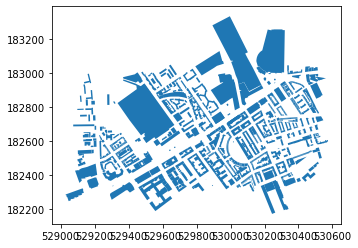

In [7]:
gdf_building_footprints = ox.footprints_from_polygon(bbox, footprint_type='building')
gdf_building_footprints = gdf_building_footprints.to_crs(epsg=27700)

gdf_building_footprints.plot()

[]

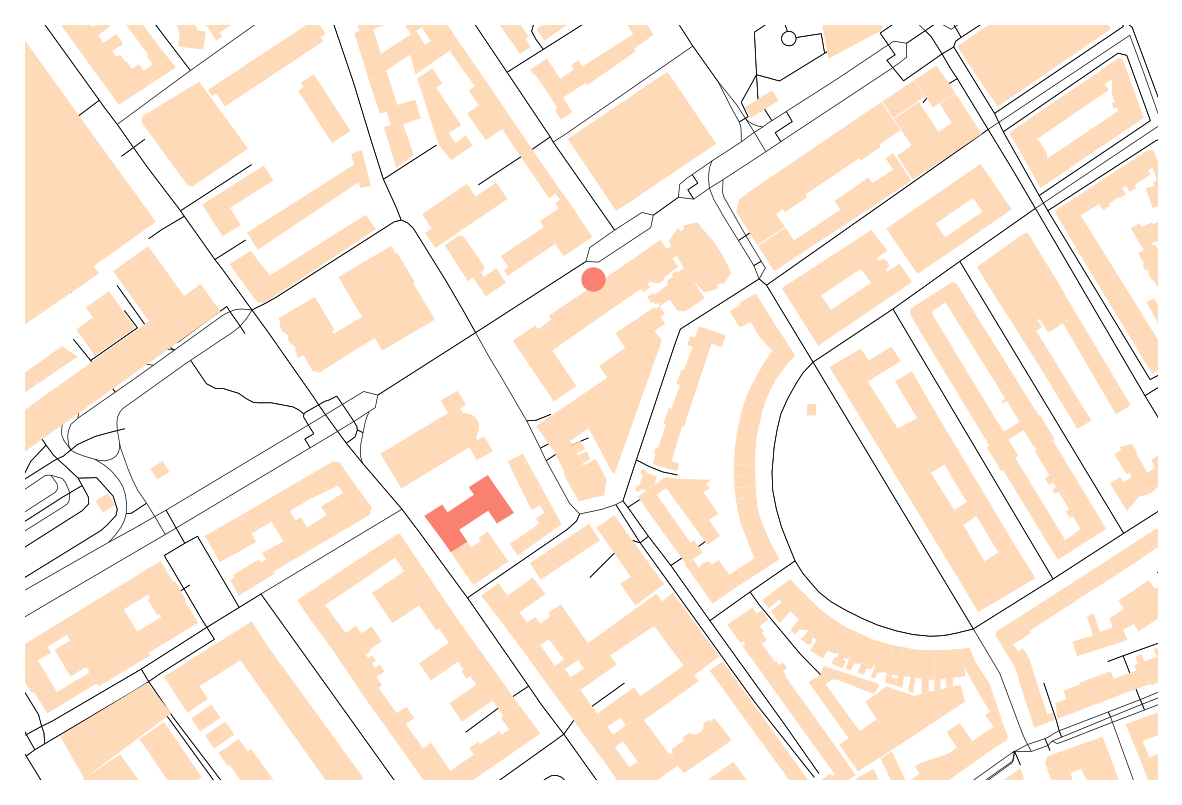

In [8]:
central_house = gdf_building_footprints[gdf_building_footprints['addr:postcode']=='WC1H 0NN']['geometry'].iloc[0]
euston_sensor = Point(-0.12877, 51.52797)

## Plotting
fig, ax = plt.subplots(dpi=250)

gdf_street_edges.plot(ax=ax, color='k', linewidth=0.2, zorder=0)
gdf_building_footprints.plot(ax=ax, color='peachpuff', zorder=1)

gpd.GeoSeries([central_house]).plot(ax=ax, color='salmon')
gpd.GeoSeries([euston_sensor], crs='epsg:4326').to_crs(epsg=27700).plot(ax=ax, color='salmon')

ax.set_xlim(529600, 530200)
ax.set_ylim(182400, 182800)

hide_spines(ax, positions=['top', 'bottom', 'left', 'right'])
ax.set_xticks([])
ax.set_yticks([])

In [14]:
## Initialising map with custom tiles
m = folium.Map([51.527587, -0.129749], zoom_start=17, tiles='cartodbpositron')

## Plotting Central House
buildings = folium.FeatureGroup(name='Central House')
folium.GeoJson(gpd.GeoSeries([central_house], crs='epsg:27700')).add_to(buildings)

## Plotting sensors
sensors = folium.FeatureGroup(name='Emissions Sensor')
folium.CircleMarker(location=[51.52797, -0.12877], popup='test', fill=True).add_to(sensors)

## Defining layers
buildings.add_to(m)
sensors.add_to(m)

m